In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [1]:
!pip install xgboost

  Using cached xgboost-2.1.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.0-py3-none-win_amd64.whl (124.9 MB)


In [3]:
df = pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [9]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [7]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [8]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [10]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5))

Age 4.62357
TypeofContact 0.51146
DurationOfPitch 5.13502
NumberOfFollowups 0.92062
PreferredPropertyStar 0.53191
NumberOfTrips 2.86416
NumberOfChildrenVisiting 1.35025
MonthlyIncome 4.76678


In [11]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [13]:
df.Age.fillna(df.Age.median(),inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [15]:
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

In [25]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(len(num_features))

13


In [26]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(len(cat_features))

6


In [27]:
discrete_features = [feature for feature in num_features if len(df[feature].unique()) >= 25]
print(len(discrete_features))

4


In [29]:
continuos_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print(len(continuos_features))

9


In [31]:
X = df.drop(['ProdTaken'],axis=1)
y = df['ProdTaken']

In [32]:
X.head()

,CustomerID,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,200000,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,200001,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,200002,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,200003,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,200004,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [33]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.30 , random_state=10)

In [36]:
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

In [37]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

In [38]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoding",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [39]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix,precision_score,recall_score, f1_score , roc_auc_score

In [44]:
models = {
    "GradientBoosting":GradientBoostingClassifier(),
    "XGBClassifier":XGBRFClassifier()
}
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_accuract = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred , average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred )
    model_train_recall = recall_score(y_train,y_train_pred )
    model_train_rocauc_score= roc_auc_score(y_train,y_train_pred )
    
    model_test_accuract = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred , average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred )
    model_test_recall = recall_score(y_test,y_test_pred )
    model_test_rocauc_score= roc_auc_score(y_test,y_test_pred )
    
    

In [45]:
# rf_params = {"max_depth":[5,8,15,None,10],
#              "max_features":[5,7,"auto",8],
#              "min_samples_split":[2,8,15,20],
#              "n_estimators":[100,200,500,1000]
#              }
gradient_params ={'loss':['log_loss','deviance','exponential'],
                  'criterion':['friedman_nse','squared_error','mse'],
                  'min_samples_split':[2,8,15,20],
                  'n_estimators':{100,200,500,1000},
                  'max_depth':[5,8,15,None,10]
                  }
xgboost_params = {
    "learning_rate":[0.1,0.01],
    'max_depth':[5,8,12,20,30],
    'n_estimators':[100,200,300],
    'colsample_bytree':[0.5,0.8,1,0.3,0.4]
}
randomcv_models =[("GB",GradientBoostingClassifier(),gradient_params),("XGB",XGBRFClassifier(),xgboost_params)]

In [48]:
from sklearn.model_selection import RandomizedSearchCV

model_params = {}
for name , model , params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1
                                )
    random.fit(X_train , y_train)
    model_params[name] = random.best_params_
    
for model_name in model_params:
    print(model_params[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
RF


In [ ]:
models = {
    "GradientBoosting":GradientBoostingClassifier(n_estimators=500,min_samples_split=20,max_depth=15,loss='exponential',criterion='mse'),
    "XGBoost":XGBRFClassifier(n_estimators=200,learning_rate=0.1,max_depth=12,colsample_bytree=1)
}
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_accuract = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred , average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred )
    model_train_recall = recall_score(y_train,y_train_pred )
    model_train_rocauc_score= roc_auc_score(y_train,y_train_pred )
    
    model_test_accuract = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred , average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred )
    model_test_recall = recall_score(y_test,y_test_pred )
    model_test_rocauc_score= roc_auc_score(y_test,y_test_pred )

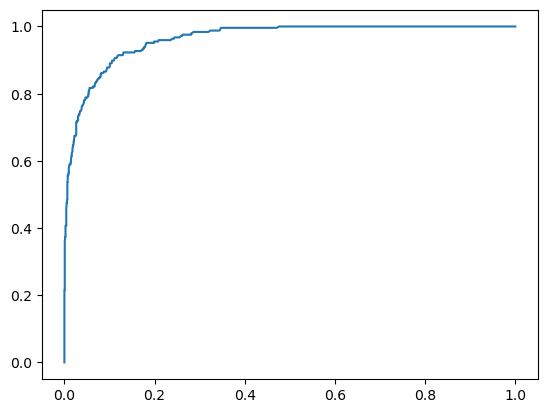

In [54]:
from sklearn.metrics import roc_auc_score , roc_curve
plt.figure()

auc_models = [
    {
        "labels":'XGBoost',
        "model":XGBRFClassifier(n_estimators=200,learning_rate=0.1,max_depth=12,colsample_bytree=1),
        "auc":0.8882
    }
]
for algo in auc_models:
    model = algo['model']
    model.fit(X_train,y_train)
    fpr , tpr , thresholds = roc_curve(y_test , model.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr , label='%s ROC (area = %0.2f)'%(algo['labels'],algo['auc']))
    plt.show()